# Subgraph popularity

In [3]:
import pandas as pd
import os
import networkx as nx
import re
import matplotlib.pyplot as plt

# Gets the current directory where the script is located
current_dir = os.getcwd()
print(current_dir)
current_dir = current_dir.replace("src", "dataset")

# Builds full paths to .csv files within the current directory
nodes_path = os.path.join(current_dir, 'nodes.csv')
edges_path = os.path.join(current_dir, 'edges.csv')

# Upload CSV files using paths relative to the current directory, limited to a subset of rows
nodes_df = pd.read_csv(nodes_path)
edges_df = pd.read_csv(edges_path)

popularity_threshold = 80

d:\Code_GitHub\Python\LFN\lfn_project\src


In [4]:
# Create Graph    
G = nx.Graph()

# Add nodes on the graph
for index, row in nodes_df.iterrows():
    # a node will be added only if it's more popular than the threshold
    if (row['popularity'] >= popularity_threshold):
        G.add_node(row['spotify_id'], name=row['name'], followers=row['followers'],
            popularity=row['popularity'], genres=row['genres'], chart_hits=row['chart_hits'])

# Add edges on the graph
for index, row in edges_df.iterrows():
    # add the edge only if both nodes are in the graph
    if ( row['id_0'] in G and row['id_1'] in G ):
        G.add_edge(row['id_0'], row['id_1'])
    


# Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# Create a dictionary mapping nodes to their 'name' attribute
labels = nx.get_node_attributes(G, 'name')

Number of nodes: 190
Number of edges: 1290


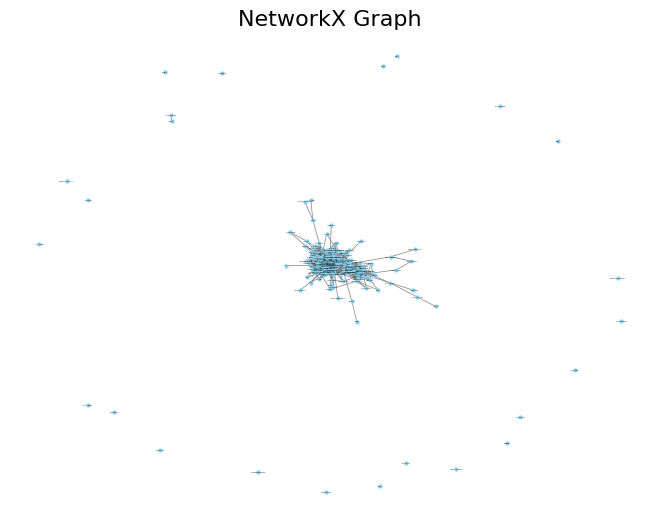

In [5]:
nx.draw(G, labels=labels, with_labels=True, node_color="skyblue", node_size=4, edge_color="grey", width=0.5  , font_size=1)
plt.title("NetworkX Graph", fontsize=16)  # Optional: Add a title
plt.savefig("networkx_graph.pdf", format="pdf")
plt.show()